In [1]:
import torch
print(torch.__version__)
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.models.feature_extraction import get_graph_node_names
from torchvision.models.feature_extraction import create_feature_extractor
import glob
import os
from PIL import Image
import numpy as np
import cv2
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader,Dataset

2.0.0


In [9]:
m = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2) #  resnet50()
m

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [11]:
return_nodes = {
    'avgpool': 'out',
}

model = create_feature_extractor(m, return_nodes=return_nodes)


In [12]:
mean = [0.485, 0.456, 0.406] 
std = [0.229, 0.224, 0.225]

transform_norm = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Resize((224,224)),
    transforms.Normalize(mean, std)]
)

In [34]:
image_path = "/kaggle/input/elene-videos/video_001/trimmed_video/keyframes_video_accss_001_elena_seg03.mp4"

images = glob.glob(
    os.path.join(
        image_path,
        "*.jpeg"
    )
)

# images.sort()

print(images[:2])

image_1 = np.array(Image.open(images[0]))
image_2 = np.array(Image.open(images[1]))

outs = []
for img in [image_1, image_2]:
    img_normalized = transform_norm(img).float()
    img_normalized = img_normalized.unsqueeze_(0)
    img_normalized = img_normalized
    with torch.no_grad():
        model.eval()  
        output = model(img_normalized)["out"]
        output = output.squeeze_(0).squeeze_(1).squeeze_(1)
        print(output.shape)
        outs.append(output)

['/kaggle/input/elene-videos/video_001/trimmed_video/keyframes_video_accss_001_elena_seg03.mp4/video_accss_001_elena_seg03_4.jpeg', '/kaggle/input/elene-videos/video_001/trimmed_video/keyframes_video_accss_001_elena_seg03.mp4/video_accss_001_elena_seg03_2.jpeg']
torch.Size([2048])
torch.Size([2048])


In [35]:
cos = torch.nn.CosineSimilarity(dim=0, eps=1e-6)
output = cos(outs[0], outs[1])
output

tensor(0.9030)

In [1]:
import os
import json

json_file = "/Users/imrankabir/Downloads/results_mar_1_2023/video_correlation_data.json"

with open(json_file, 'r') as f:
    df = json.load(f)


In [3]:
# !pip install seaborn

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

video-1-segment-5.png


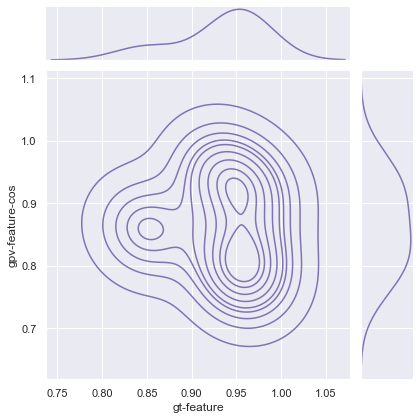

video-1-segment-4.png


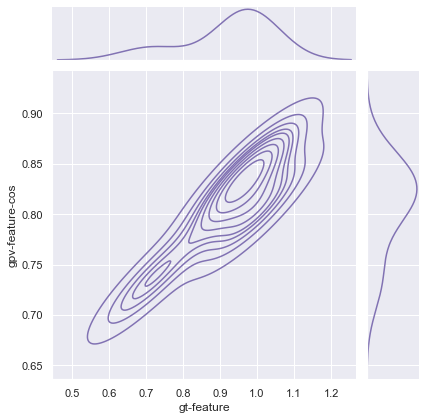

video-2-segment-1.png


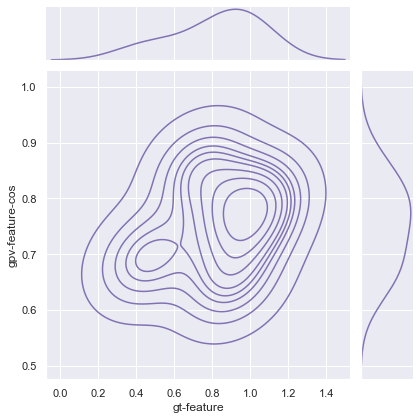

video-3-segment-3.png


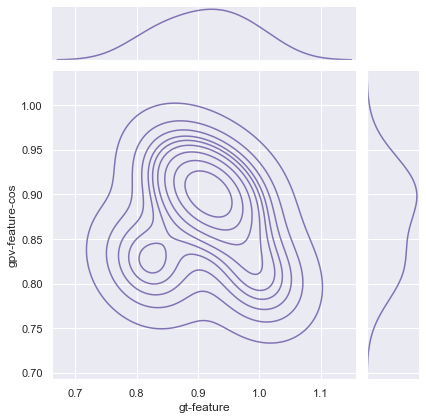

video-3-segment-2.png


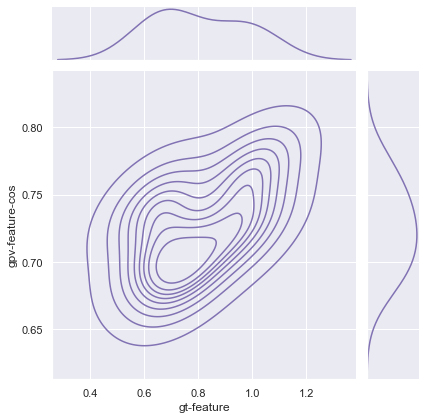

video-4-segment-4.png


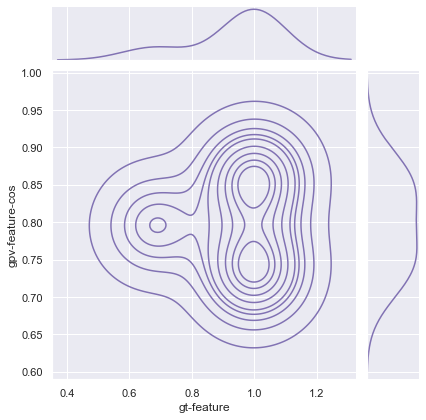

video-14-segment-4.png


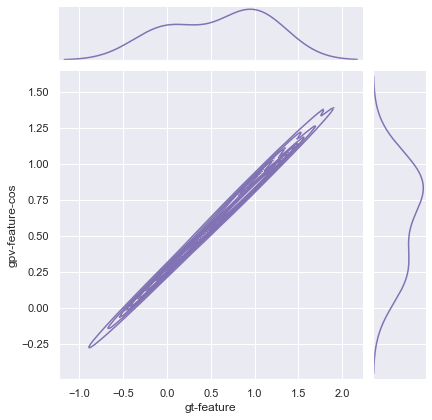

video-15-segment-3.png


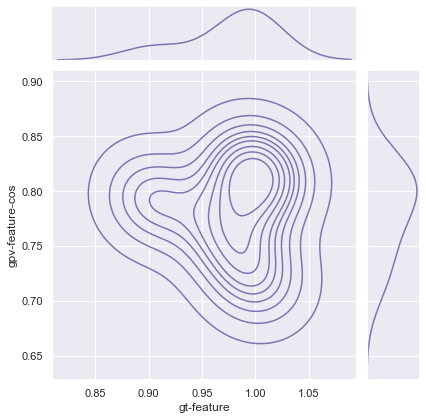

video-16-segment-3.png


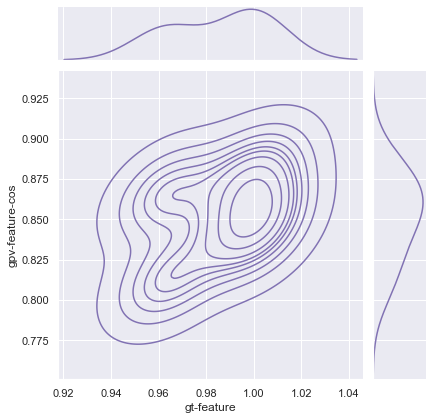

In [6]:
sns.set_theme(style="darkgrid")

# col names: 'sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety'
# class label: 'variety'
# sns.jointplot(df, x = 'petal.length', y = 'petal.width', color="m", kind= 'scatter', hue='variety')
# plt.show()

for vid in df.keys():
    for seg in df[vid].keys():
        print(f'video-{vid}-segment-{seg}.png')
        data = df[vid][seg]
        sub_df = pd.DataFrame.from_dict(data).head()
        sns.jointplot(sub_df, x = 'gt-feature', y = 'gpv-feature-cos', color="m", kind= 'kde')
        plt.show()

In [2]:
# !pip install statsmodels

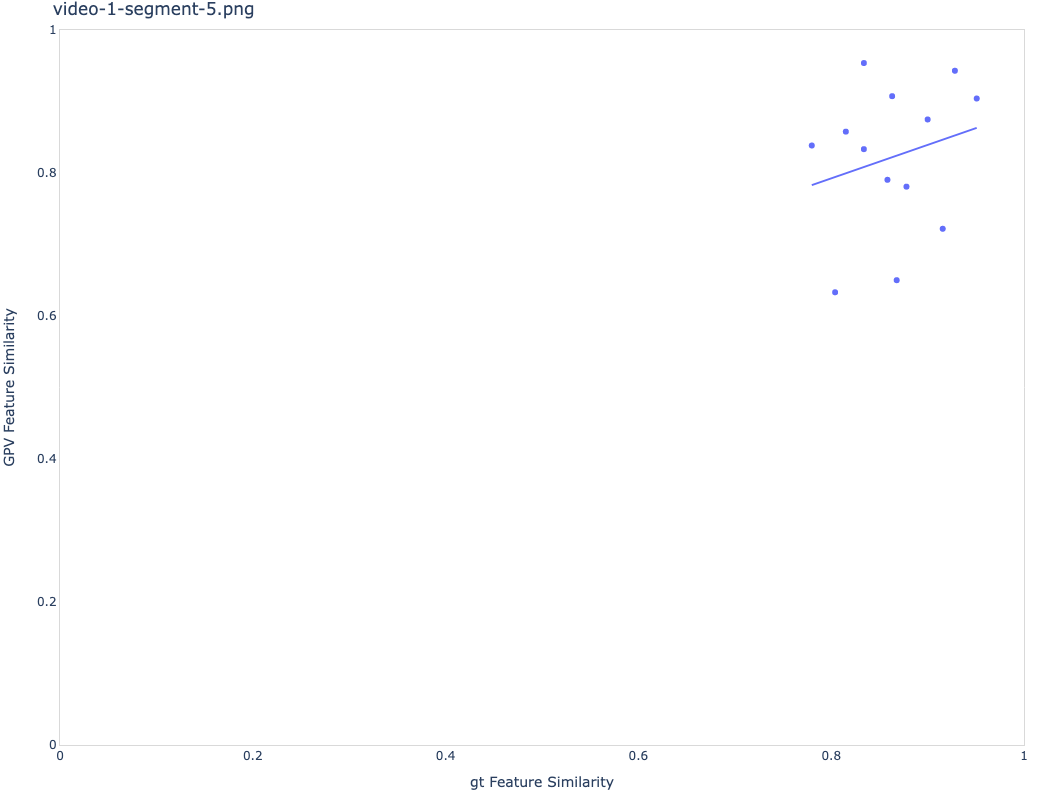

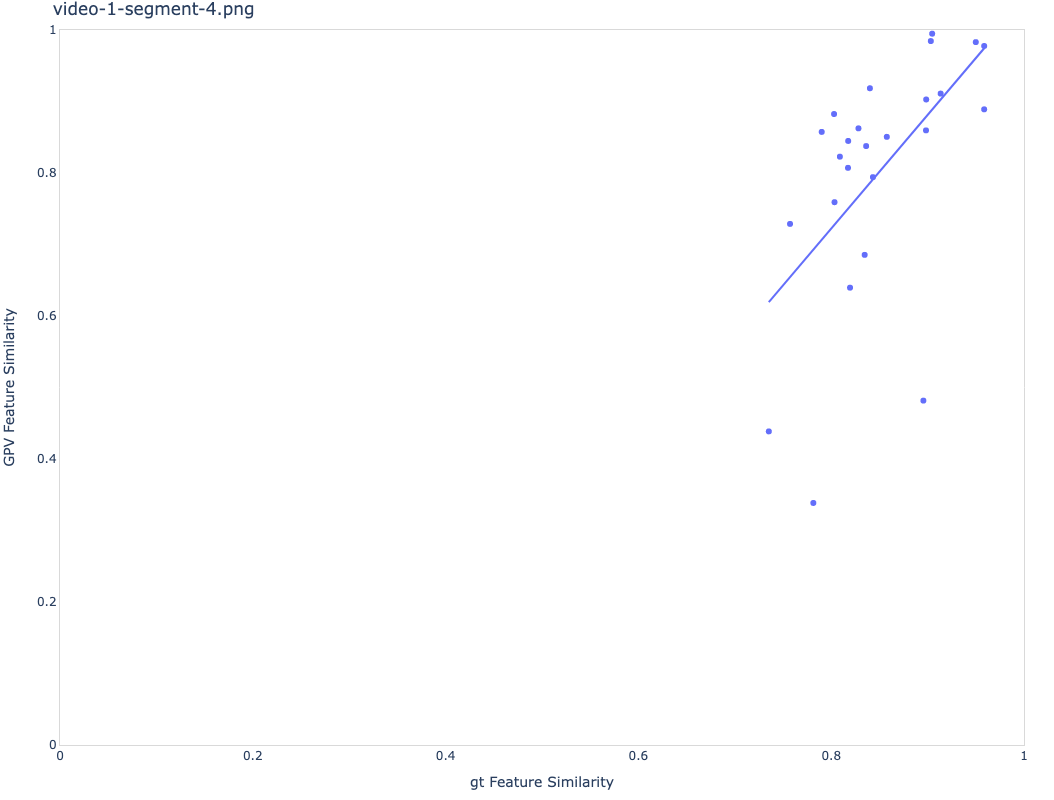

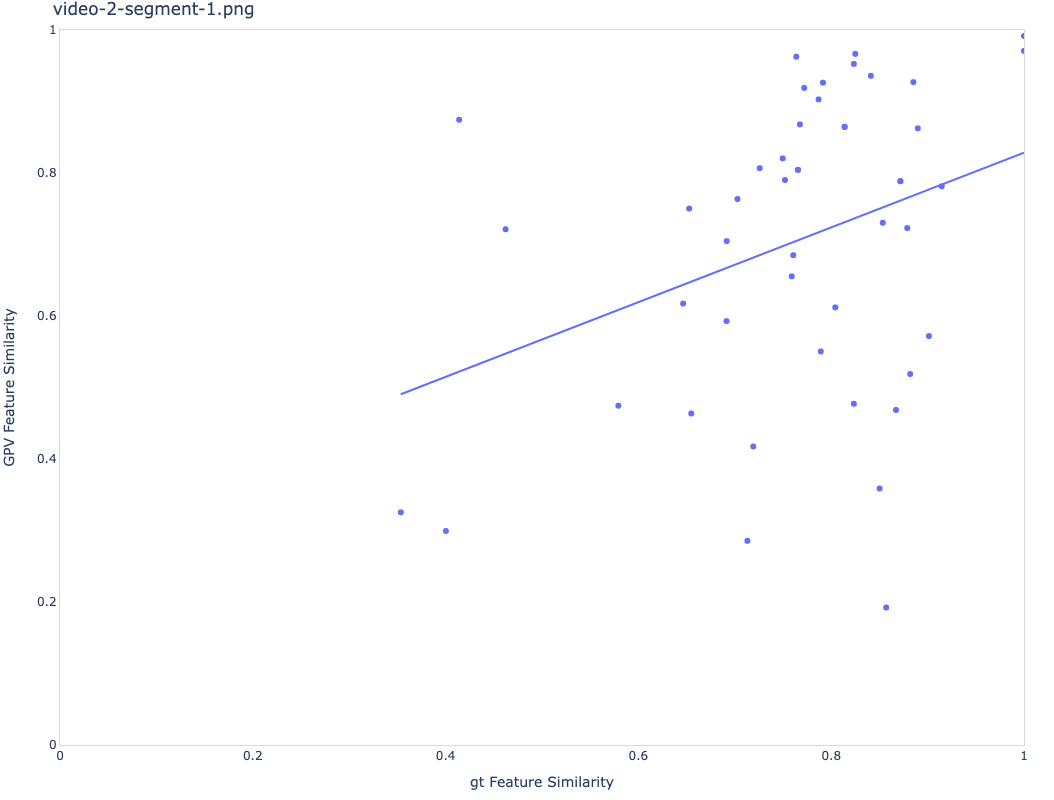

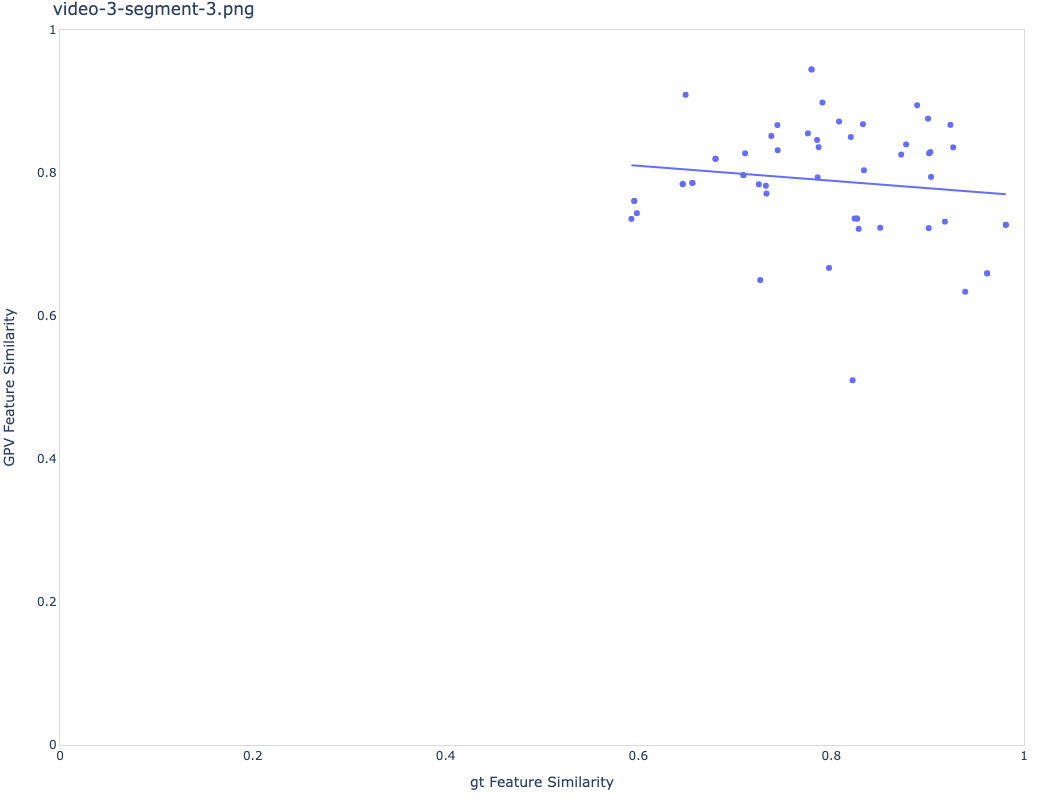

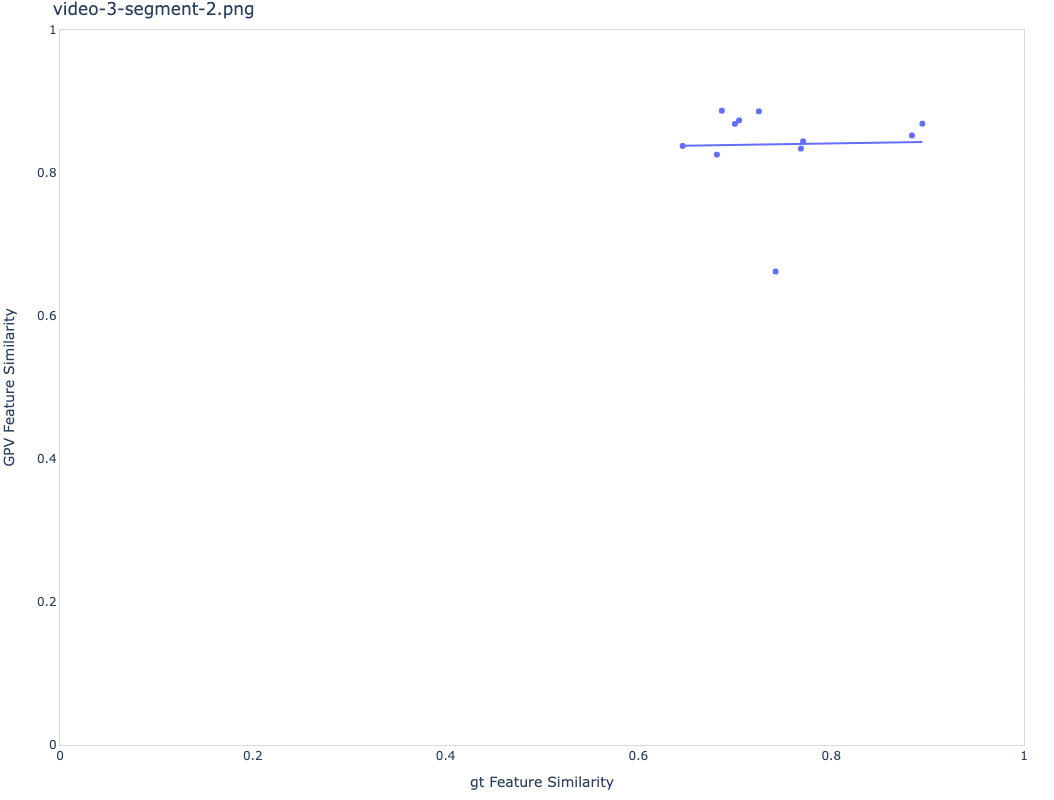

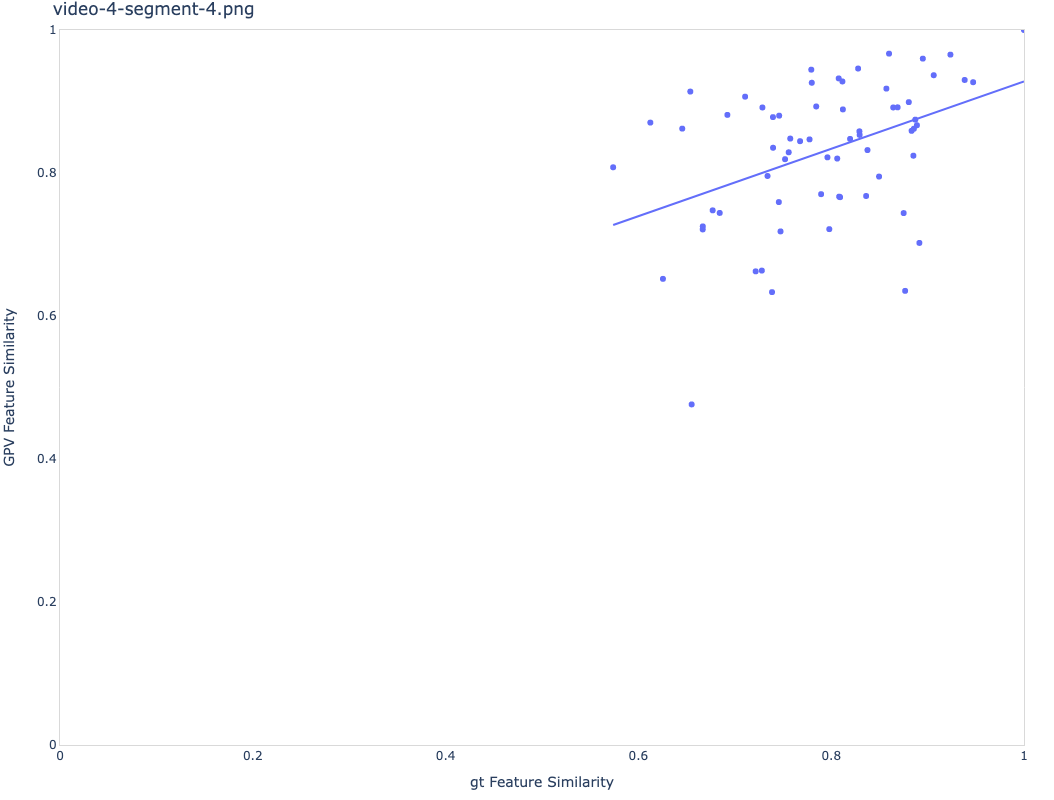

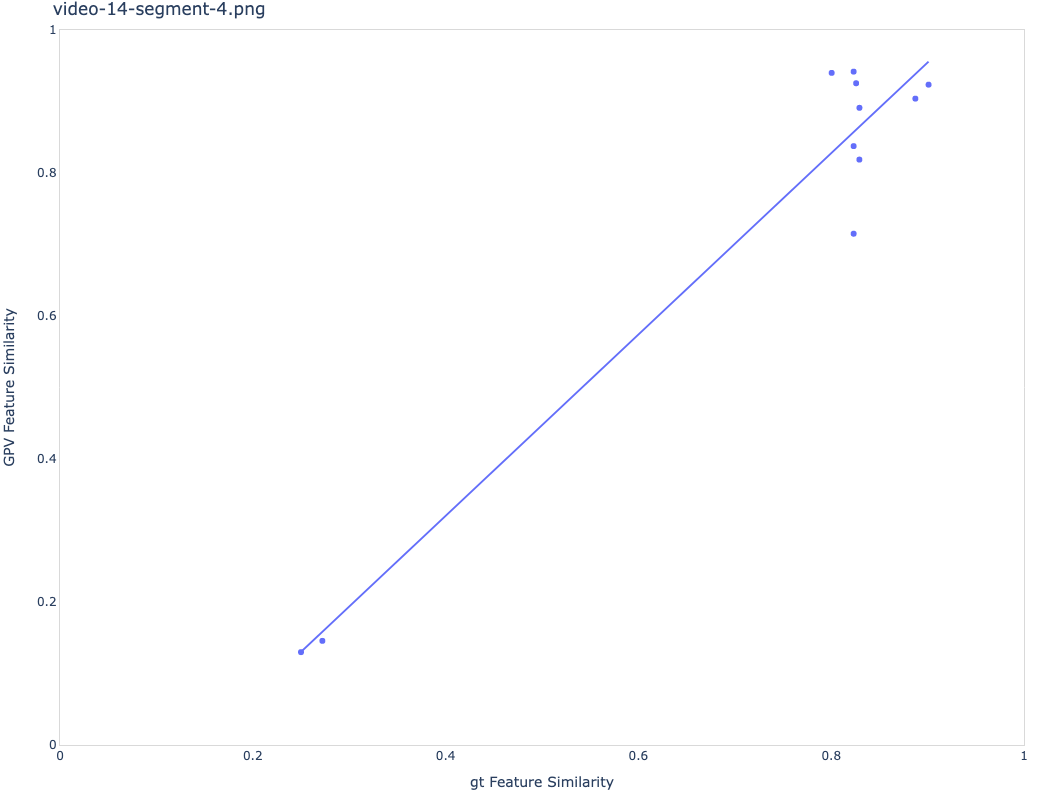

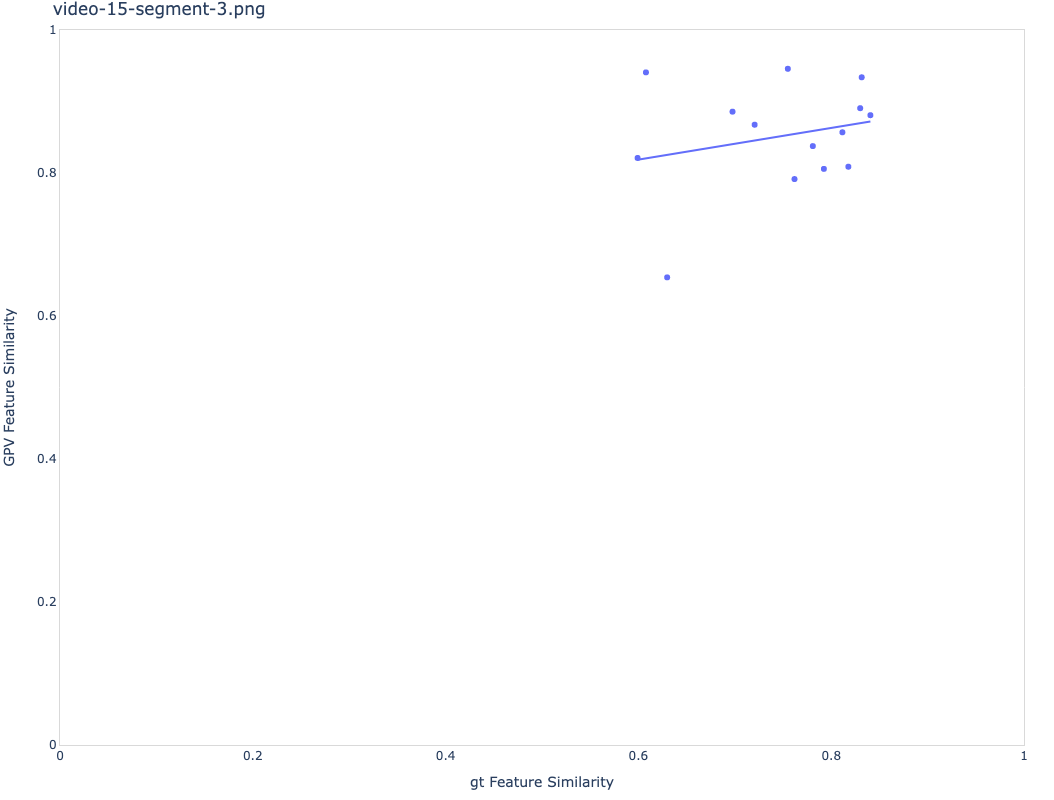

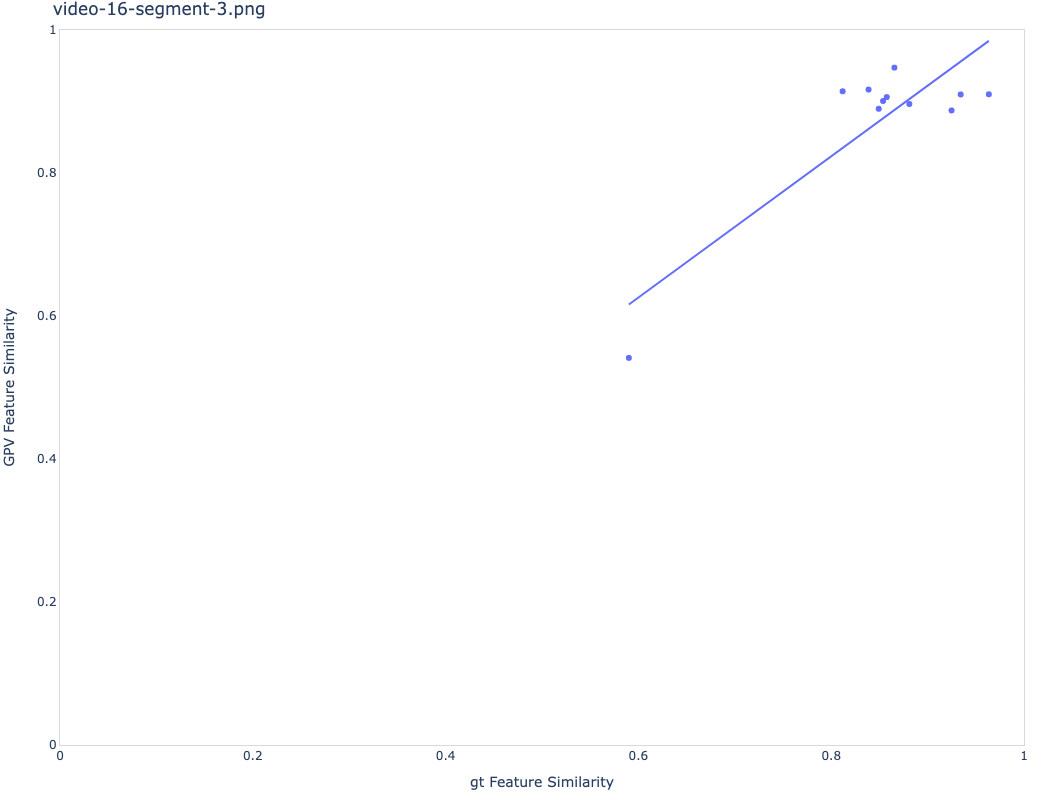

In [6]:
import plotly.graph_objects as go
import plotly.express as px


out_folder = "/Users/imrankabir/Downloads/results/plot_corr/gpv_vs_resnet"

for vid in df.keys():
    for seg in df[vid].keys():
        data = df[vid][seg]

        layout = dict(plot_bgcolor='white',
                      title=f'video-{vid}-segment-{seg}.png',
                      width=800,
                      height=800,
                      margin=dict(t=30, l=30, r=30, b=30),
                      xaxis=dict(title='gt Feature Similarity',
                                 range=[0.0, 1.0],
                                 linecolor='#d9d9d9',
                                 showgrid=False,
                                 mirror=True),
                      yaxis=dict(title='GPV Feature Similarity',
                                 range=[0.0, 1.0],
                                 linecolor='#d9d9d9',
                                 showgrid=False,
                                 mirror=True))

        fig_tmp = px.scatter(x=data['gpv-feature-cos'],
                          y=data['resnet-152'],
                          trendline='ols')

        fig = go.Figure(data=fig_tmp.data, layout=layout)

        fig.show()
        fig.write_image(os.path.join(out_folder, f'video-{vid}-segment-{seg}-corr.png'))
        # img_bytes = fig.to_image(format="png")
        #
        # with open(os.path.join(out_folder, f'video-{vid}-segment-{seg}-corr.png'), 'wb') as f:
        #     f.write(img_bytes)